# Задача 3

In [2]:
%matplotlib inline
import math as mt
import matplotlib
from pylab import *
import numpy as np
from numpy import linalg
from scipy.stats import *
import matplotlib.pyplot as plt
from numpy.random import shuffle

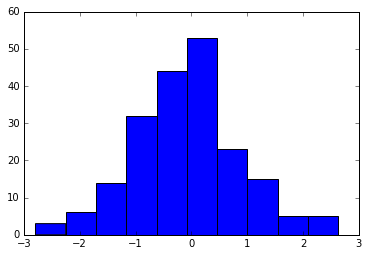

In [9]:
# Генерирую выборку
sz = 200
x = norm.rvs(size=sz)
gamma = 0.95
hist(x)
show()

# $ \text{Exact confidence interval for } a \text{ with known } \sigma^2$

Interval $\hat{a} \in \left( \overline{X} - U_{\frac{1+\gamma}{2}}\frac{\sigma}{\sqrt{n}}, \overline{X} - U_{\frac{1-\gamma}{2}}\frac{\sigma}{\sqrt{n}} \right)$

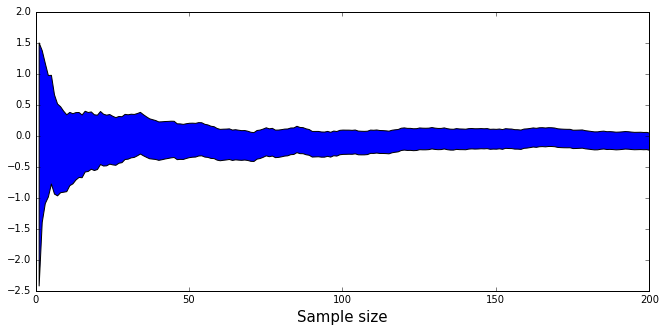

In [35]:
def Interval(data, p):
    u1 = norm.ppf((1+p)/2) # Квантиль нормального распределения
    u2 = norm.ppf((1-p)/2)
    return mean(data) - (u1/sqrt(len(data))),\
            mean(data) - (u2/sqrt(len(data)))
    
intervals = np.zeros((2,sz))
for i in range(1,sz+1):
    # Заполняю интервалы
    a, b = Interval(x[:i], gamma)
    intervals[0][i-1] = a
    intervals[1][i-1] = b
    
figure(figsize=(11,5))
fill_between(arange(1,sz+1), intervals[0], intervals[1])
xlabel("Sample size", fontsize=15)
show()

# $ \text{Exact confidence interval for } \sigma^2 \text{ with known } a$

Interval $\hat{\sigma^2} \in \left( 0, \frac{\sum(X_i - a)^2}{\chi^2_{1-\alpha},n-1} \right)$

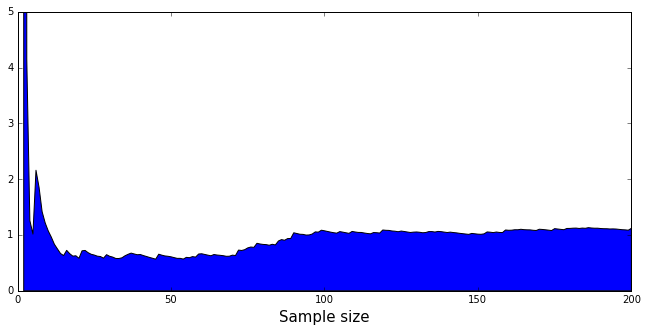

In [38]:
def Interval(data, p):
    u1 = chi2.ppf(1-p, df=len(data)-1) # Квантиль распределения хи-квадрат
    a = 0
    tmp = sum((data - a) ** 2)
    return 0, tmp / u1
    
intervals = np.zeros((2,sz))
for i in range(1,sz+1):
    # Заполняю интервалы
    a, b = Interval(x[:i], gamma)
    intervals[0][i-1] = a
    intervals[1][i-1] = b
    
figure(figsize=(11,5))
fill_between(arange(1,sz+1), intervals[0], intervals[1])
ylim(0,5)
xlabel("Sample size", fontsize=15)
show()

# $ \text{Exact confidence interval for } a \text{ with unknown } \sigma^2$

Interval $\hat{a} \in \left( \overline{X} - t_{\frac{1+\alpha}{2},n-1}\cdot\frac{\sum(X_i - \overline{X})^2}{\sqrt{n(n-1)}}, \overline{X} - t_{\frac{1-\alpha}{2},n-1}\cdot\frac{\sum(X_i - \overline{X})^2}{\sqrt{n(n-1)}} \right)$

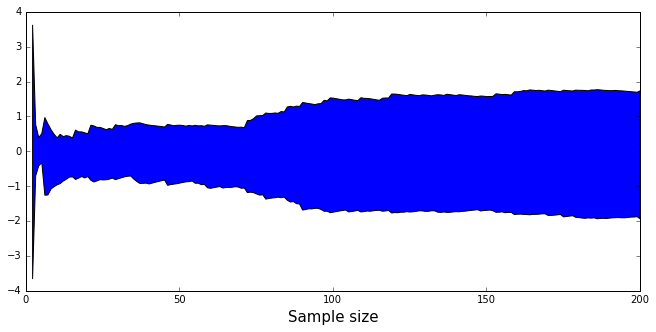

In [43]:
def Interval(data, p):
    u1 = t.ppf((1+p)/2, df=len(data)-1) # Квантиль распределения хи-квадрат
    u2 = t.ppf((1-p)/2, df=len(data)-1) # Квантиль распределения хи-квадрат
    n = len(data)
    tmp = sum((data - mean(data)) ** 2)
    return mean(data) - ((u1 * tmp)/(sqrt(n * (n-1)))),\
            mean(data) - ((u2 * tmp)/(sqrt(n * (n-1))))
    
intervals = np.zeros((2,sz))
for i in range(1,sz+1):
    a, b = Interval(x[:i], gamma)
    intervals[0][i-1] = a
    intervals[1][i-1] = b
    
figure(figsize=(11,5))
fill_between(arange(1,sz+1), intervals[0], intervals[1])
xlabel("Sample size", fontsize=15)
show()

# $ \text{Exact confidence interval for } \sigma^2 \text{ with unknown } a$

Interval $\hat{\sigma} \in \left( \sqrt{\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2},n-1}}}, \sqrt{\frac{(n-1)s^2}{\chi^2_{1-\frac{\alpha}{2},n-1}}} \right)$

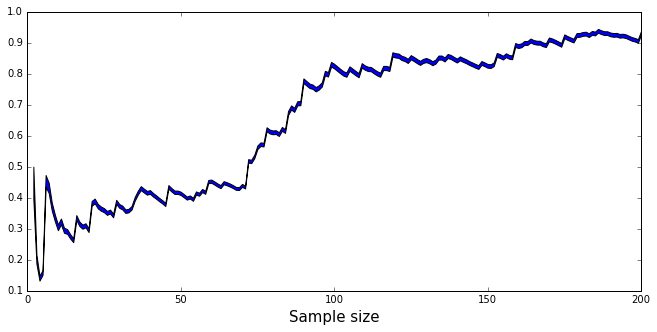

In [47]:
def Interval(data, p):
    u1 = chi2.ppf(p/2, df=len(data)-1) # Квантиль распределения хи-квадрат
    u2 = chi2.ppf(1-(p/2), df=len(data)-1)
    return (((len(data)-1) * var(data))/u1),\
            (((len(data)-1) * var(data))/u2)

intervals = np.zeros((2,sz))
for i in range(1,sz+1):
    # Заполняю интервалы
    a, b = Interval(x[:i], gamma)
    intervals[0][i-1] = a
    intervals[1][i-1] = b
    
figure(figsize=(11,5))
fill_between(arange(1,sz+1), intervals[0], intervals[1])
xlabel("Sample size", fontsize=15)
show()